# Projet Théorie des graphes


## Partie 1 :

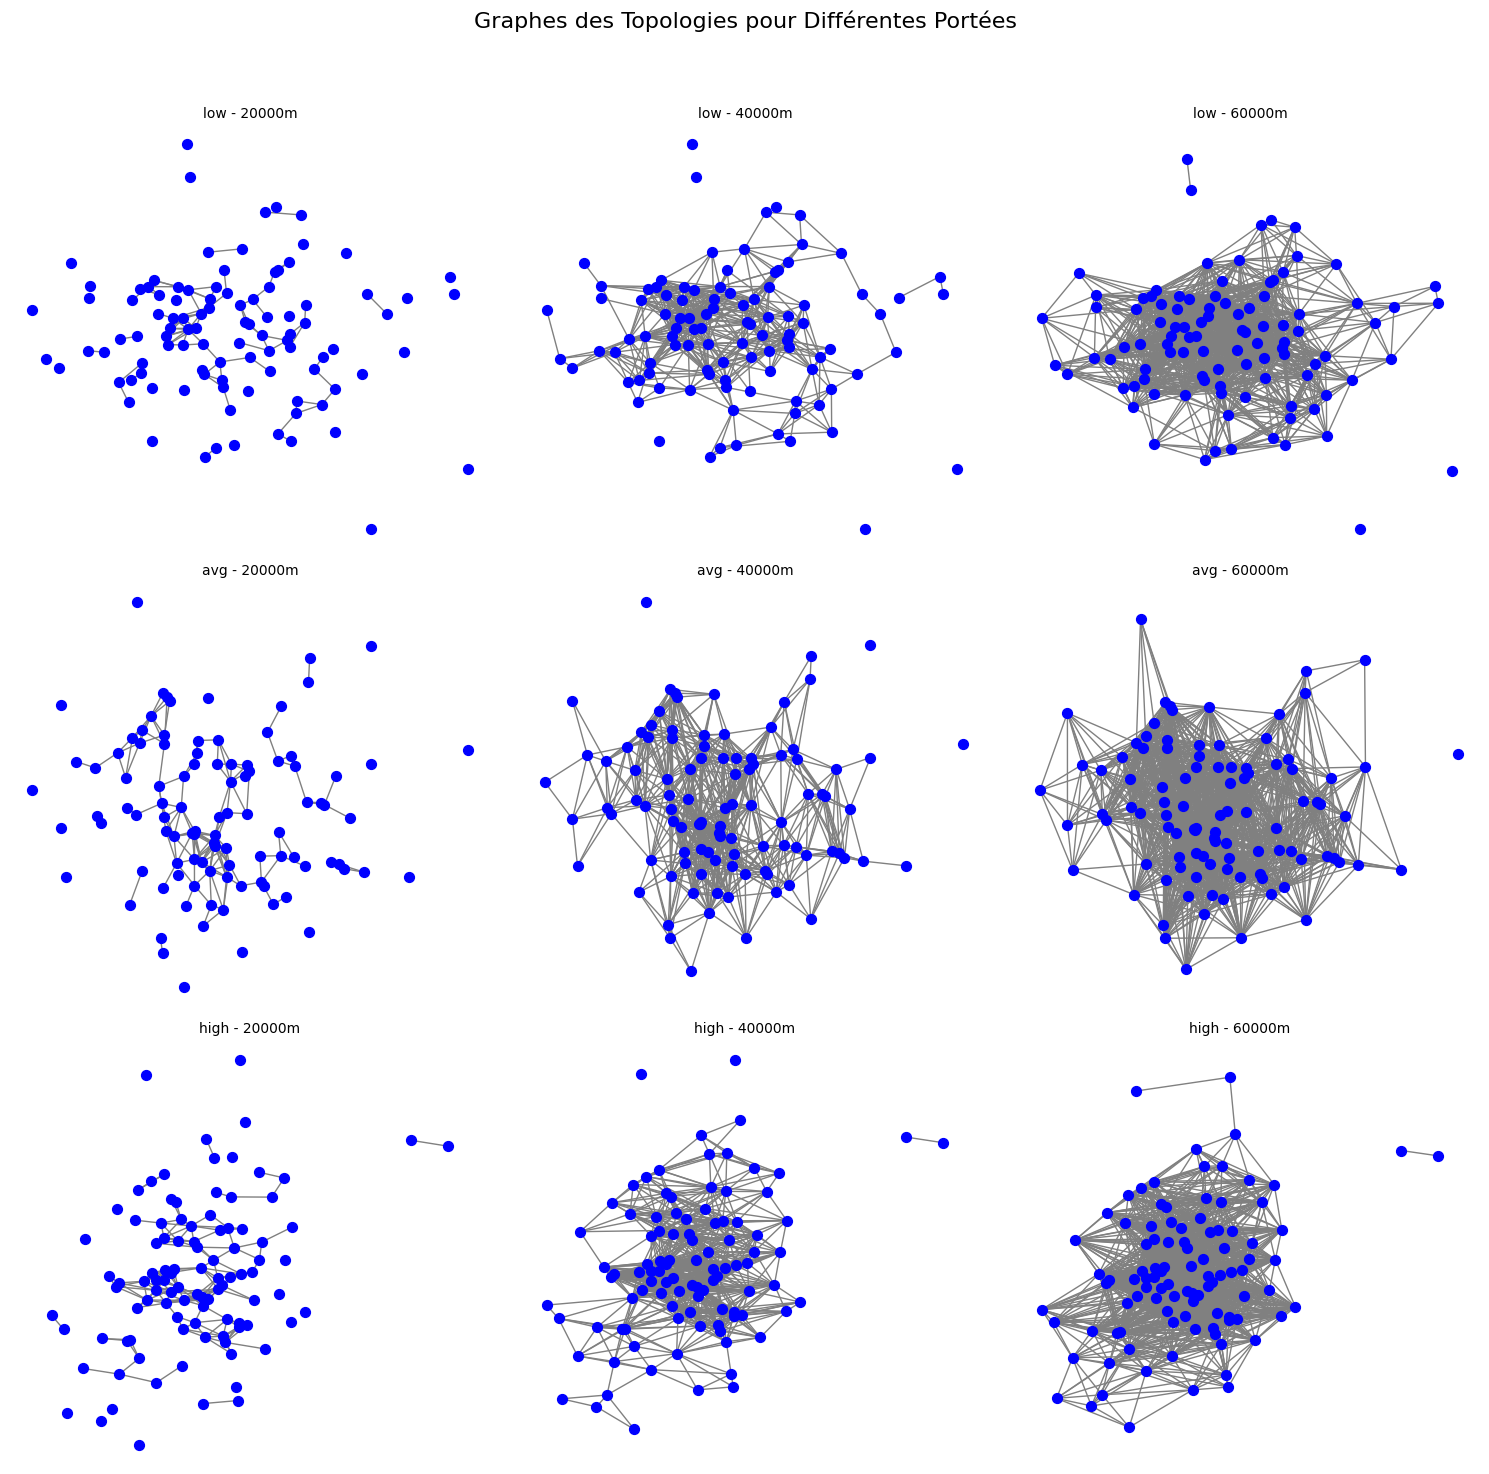

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Définir les fichiers de données et les portées
files = ["topology_low.csv", "topology_avg.csv", "topology_high.csv"]
portees = [20000, 40000, 60000]

# Dictionnaires pour stocker les matrices d'adjacence et de distances
Adjs = {}
Distances = {}

# Préparation de la figure pour afficher les graphes dans une grille (3 fichiers × 3 portées)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.suptitle("Graphes des Topologies pour Différentes Portées", fontsize=16)

# Parcourir les fichiers et les portées
for i, file in enumerate(files):
    # Charger les données
    data = pd.read_csv(file)
    coords = data.iloc[:, 1:4].values
    n = coords.shape[0]

    # Calculer la matrice des distances
    D = np.linalg.norm(coords[:, np.newaxis] - coords[np.newaxis, :], axis=2)

    # Appliquer cmdscale (équivalent à MDS dans scikit-learn)
    from sklearn.manifold import MDS
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=0)
    pos = mds.fit_transform(D)

    # Rotation des positions
    theta = -1.6
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    pos = pos @ rotation_matrix.T

    # Nom du fichier sans extension pour clé
    name = file.split("/")[-1].split("_")[1].split(".")[0]

    # Parcourir les différentes portées
    for j, portee in enumerate(portees):
        # Créer la matrice d'adjacence
        A = (D <= portee).astype(int)
        np.fill_diagonal(A, 0)

        # Visualisation du graphe
        G = nx.from_numpy_array(A)

        # Accéder à l'axe correspondant dans la grille
        ax = axes[i, j]
        ax.set_title(f"{name} - {portee}m", fontsize=10)
        nx.draw(G, pos, ax=ax, with_labels=False, node_size=50, node_color="blue", edge_color="gray")
        ax.axis("off")  # Désactiver les axes pour une meilleure lisibilité

        # Stocker les matrices
        Adjs[f"{name}_{portee}"] = A
        Distances[f"{name}_{portee}"] = D

# Ajuster l'espacement entre les sous-graphes
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Laisser de l'espace pour le titre principal


# Afficher la grille
plt.show()


## Partie 2 :


Analyse du graphe : low_20000
   Moyenne des degrés : 1.8
  Moyenne des coefficients de clustering : 0.22607936507936507
  Nombre de cliques : 77
  Nombre de composantes connexes : 39
Résumé des plus courts chemins (low_20000) :
Nombre total de plus courts chemins : 2190.0
Moyenne des plus courts chemins (en excluant les zéros) : 1.72
Nombre maximum de plus courts chemins : 9.0
Nombre minimum de plus courts chemins (en excluant les zéros) : 1.0


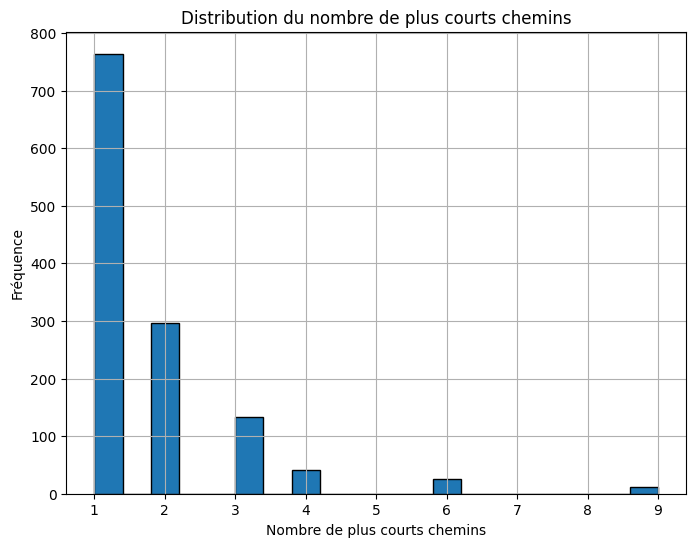

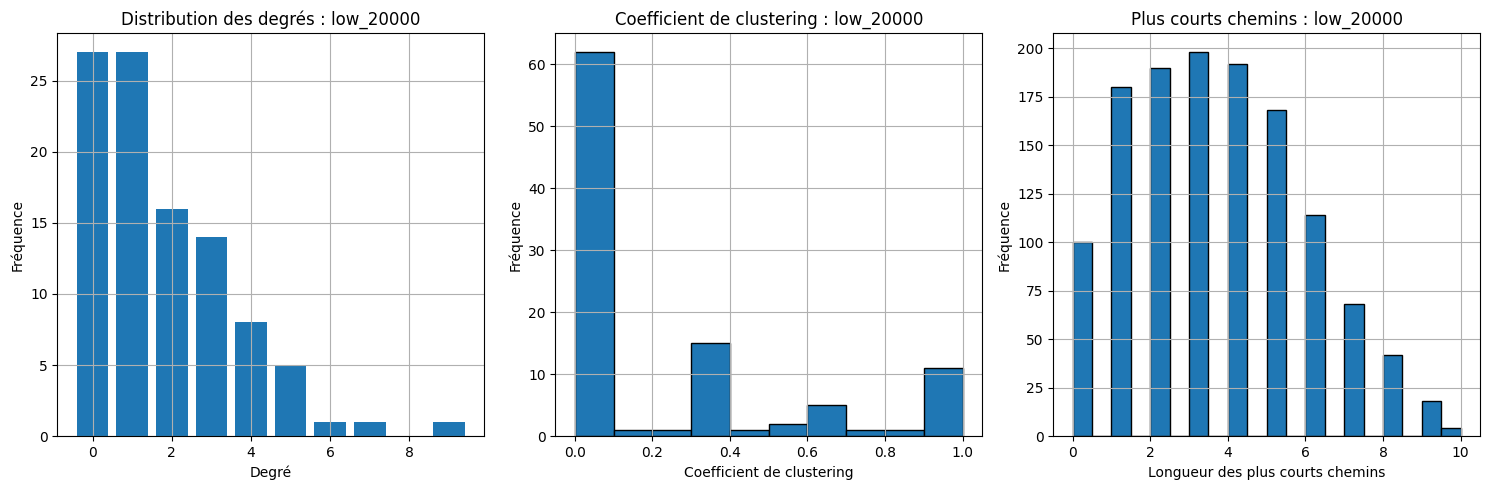


Analyse du graphe : low_40000
   Moyenne des degrés : 11.42
  Moyenne des coefficients de clustering : 0.5204658854961058
  Nombre de cliques : 147
  Nombre de composantes connexes : 8
Résumé des plus courts chemins (low_40000) :
Nombre total de plus courts chemins : 111562.0
Moyenne des plus courts chemins (en excluant les zéros) : 13.45
Nombre maximum de plus courts chemins : 495.0
Nombre minimum de plus courts chemins (en excluant les zéros) : 1.0


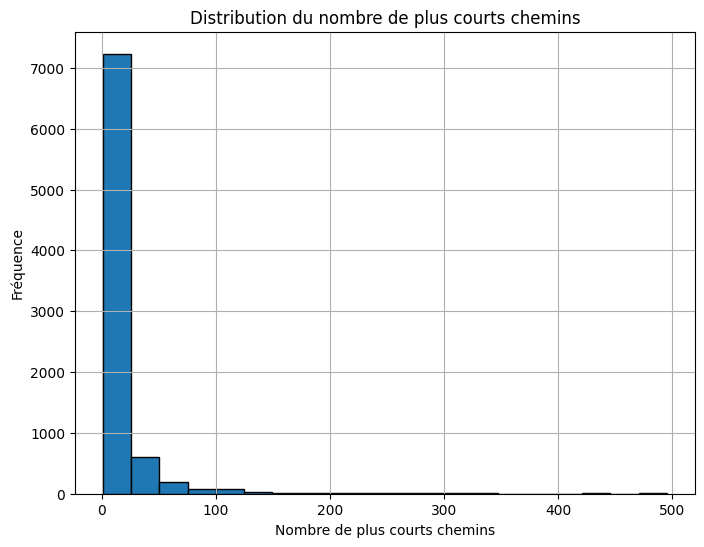

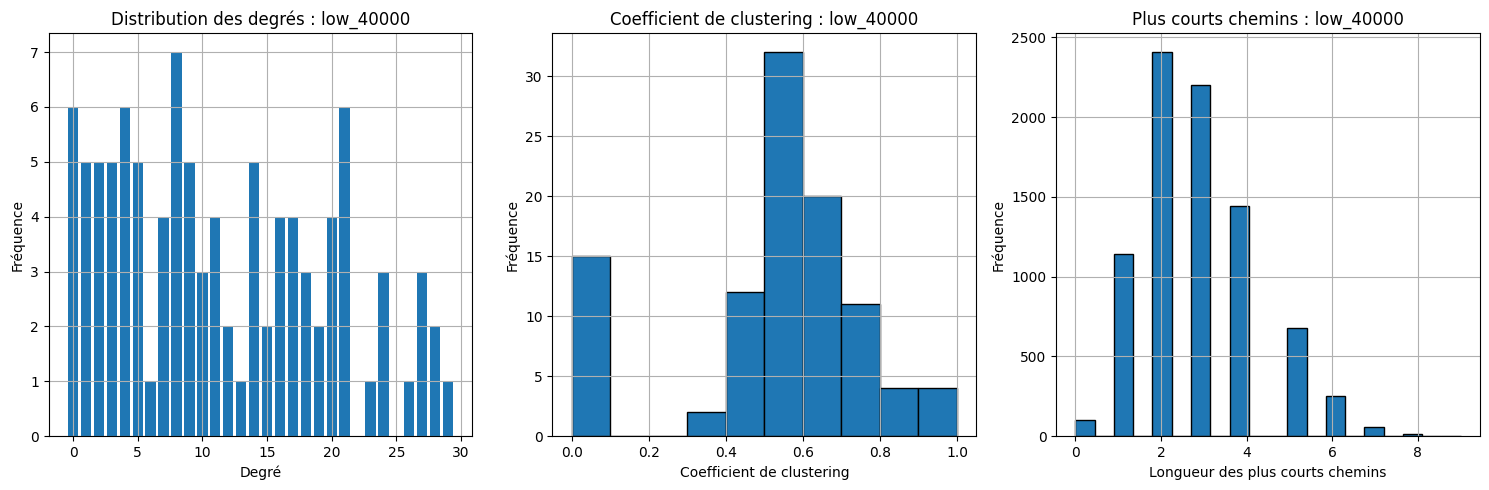


Analyse du graphe : low_60000
   Moyenne des degrés : 29.42
  Moyenne des coefficients de clustering : 0.6723798097803951
  Nombre de cliques : 301
  Nombre de composantes connexes : 4
Résumé des plus courts chemins (low_60000) :
Nombre total de plus courts chemins : 181178.0
Moyenne des plus courts chemins (en excluant les zéros) : 19.65
Nombre maximum de plus courts chemins : 1006.0
Nombre minimum de plus courts chemins (en excluant les zéros) : 1.0


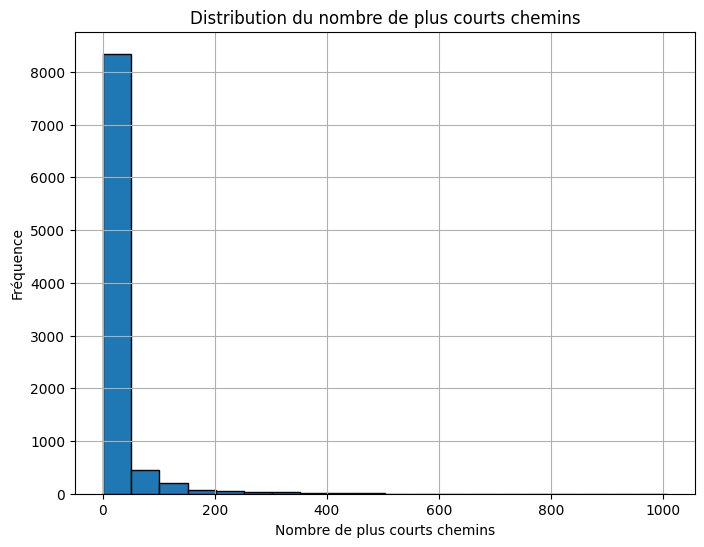

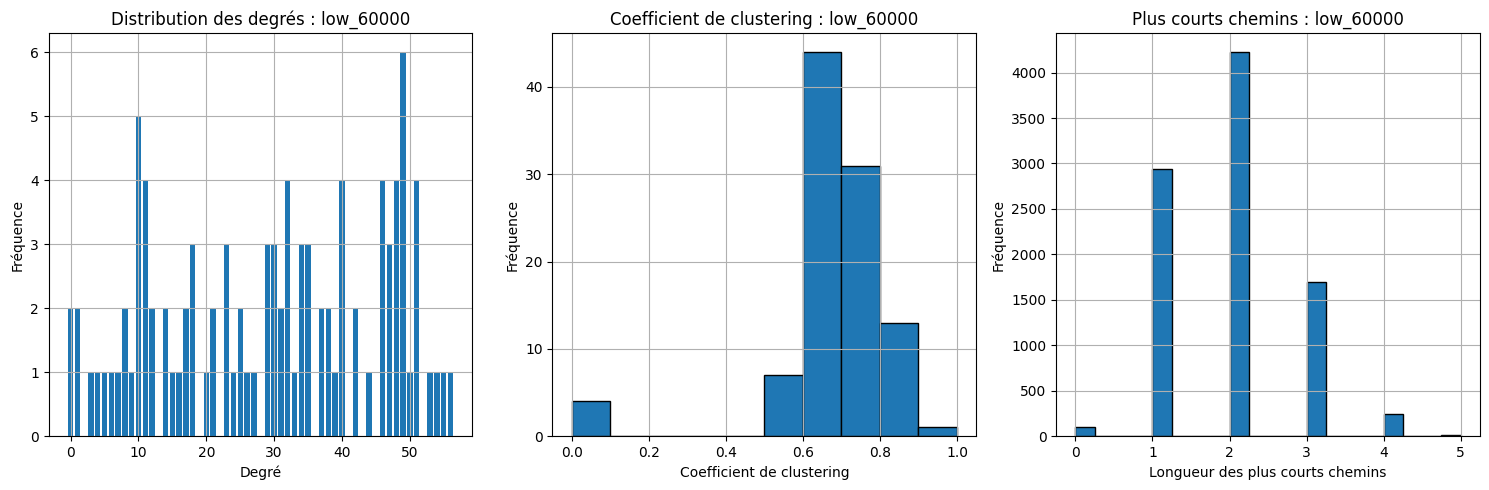


Analyse du graphe : avg_20000
   Moyenne des degrés : 3.46
  Moyenne des coefficients de clustering : 0.3637140637140637
  Nombre de cliques : 83
  Nombre de composantes connexes : 22
Résumé des plus courts chemins (avg_20000) :
Nombre total de plus courts chemins : 100520.0
Moyenne des plus courts chemins (en excluant les zéros) : 24.42
Nombre maximum de plus courts chemins : 440.0
Nombre minimum de plus courts chemins (en excluant les zéros) : 1.0


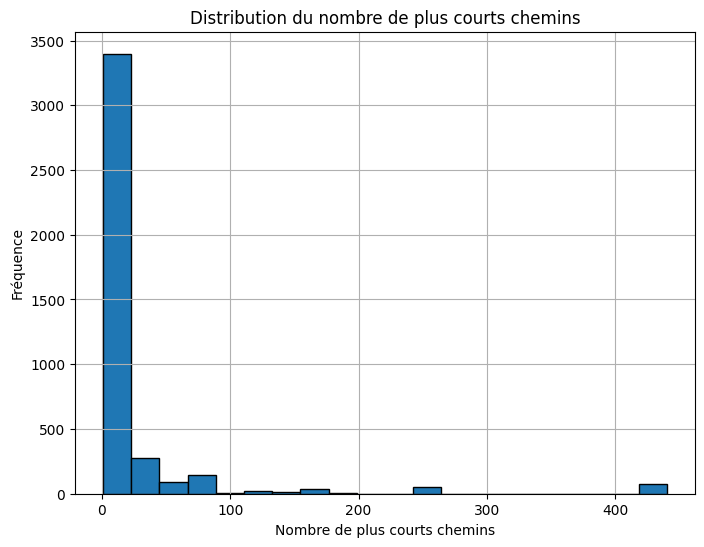

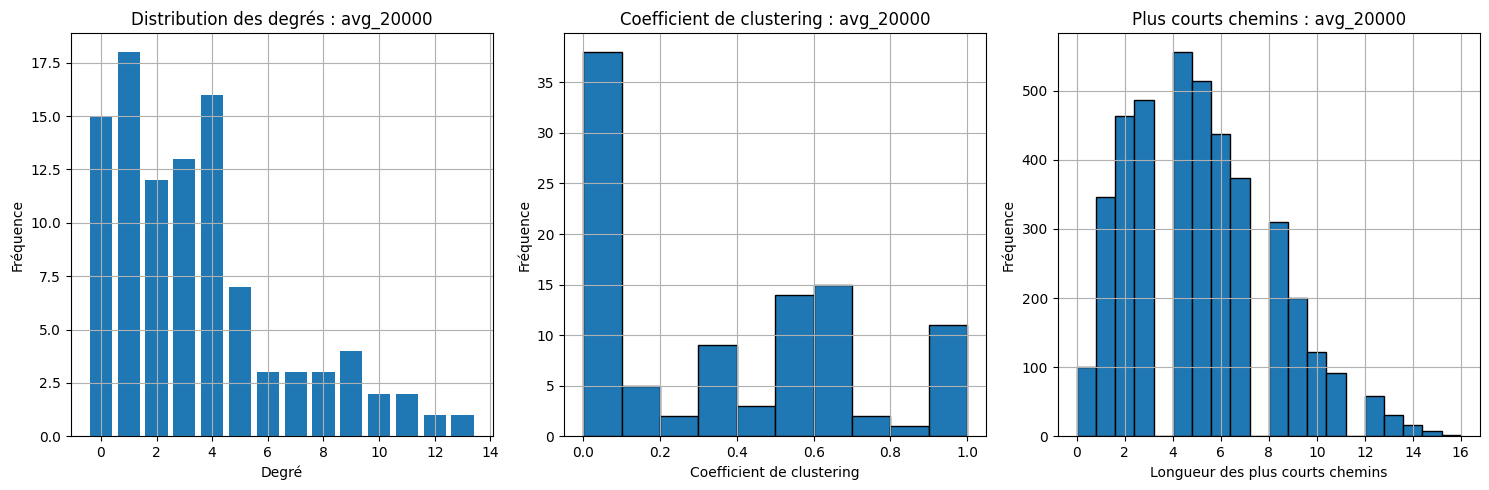


Analyse du graphe : avg_40000
   Moyenne des degrés : 16.84
  Moyenne des coefficients de clustering : 0.6369519382726182
  Nombre de cliques : 171
  Nombre de composantes connexes : 4
Résumé des plus courts chemins (avg_40000) :
Nombre total de plus courts chemins : 287884.0
Moyenne des plus courts chemins (en excluant les zéros) : 30.59
Nombre maximum de plus courts chemins : 2101.0
Nombre minimum de plus courts chemins (en excluant les zéros) : 1.0


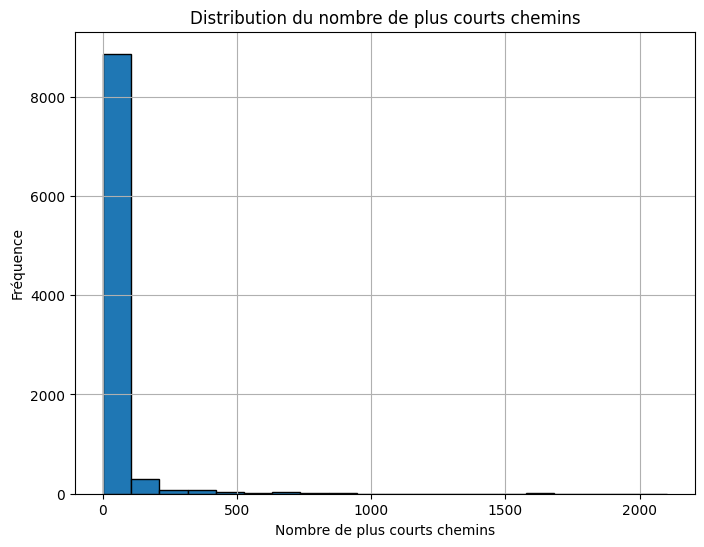

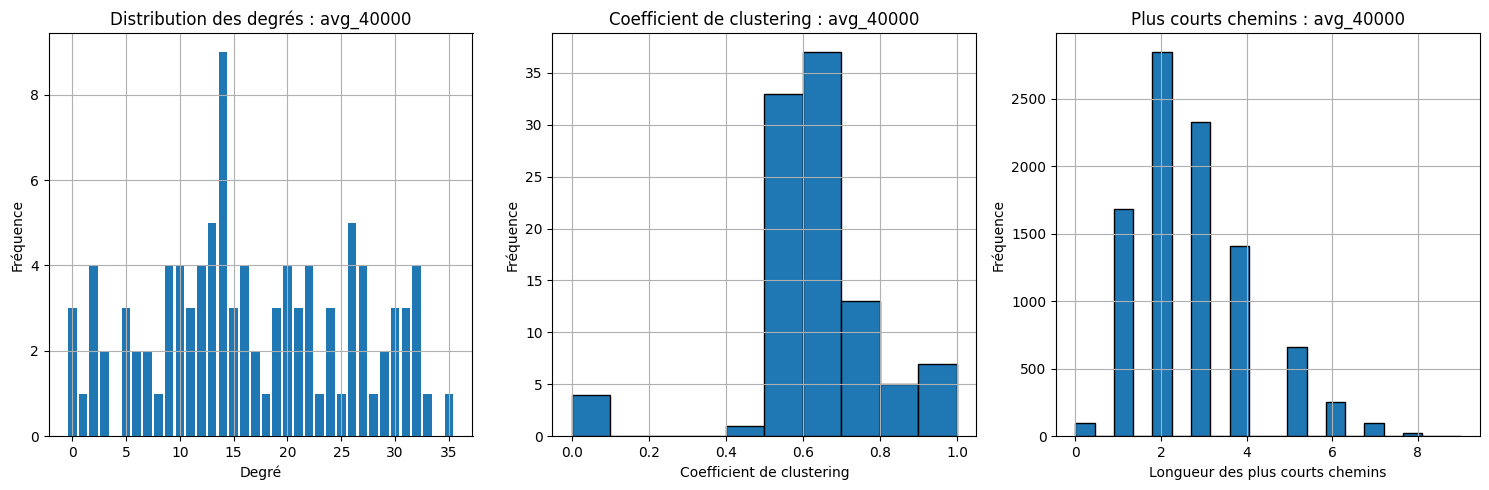


Analyse du graphe : avg_60000
   Moyenne des degrés : 35.64
  Moyenne des coefficients de clustering : 0.7280285622694811
  Nombre de cliques : 258
  Nombre de composantes connexes : 2
Résumé des plus courts chemins (avg_60000) :
Nombre total de plus courts chemins : 481666.0
Moyenne des plus courts chemins (en excluant les zéros) : 49.14
Nombre maximum de plus courts chemins : 9839.0
Nombre minimum de plus courts chemins (en excluant les zéros) : 1.0


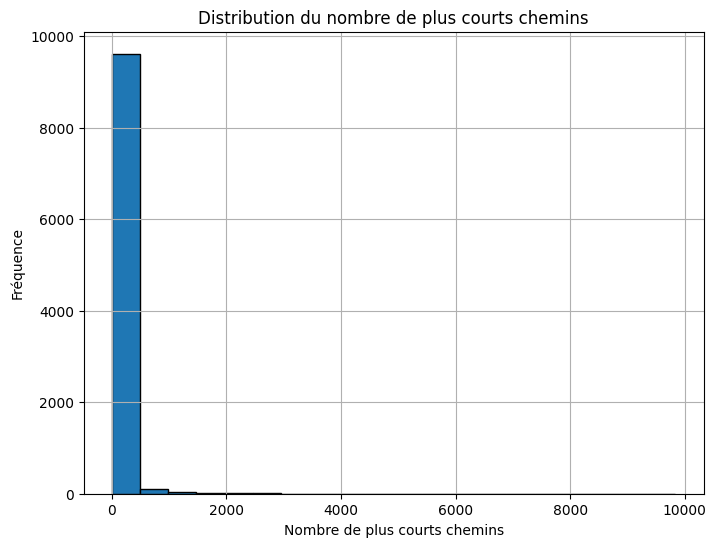

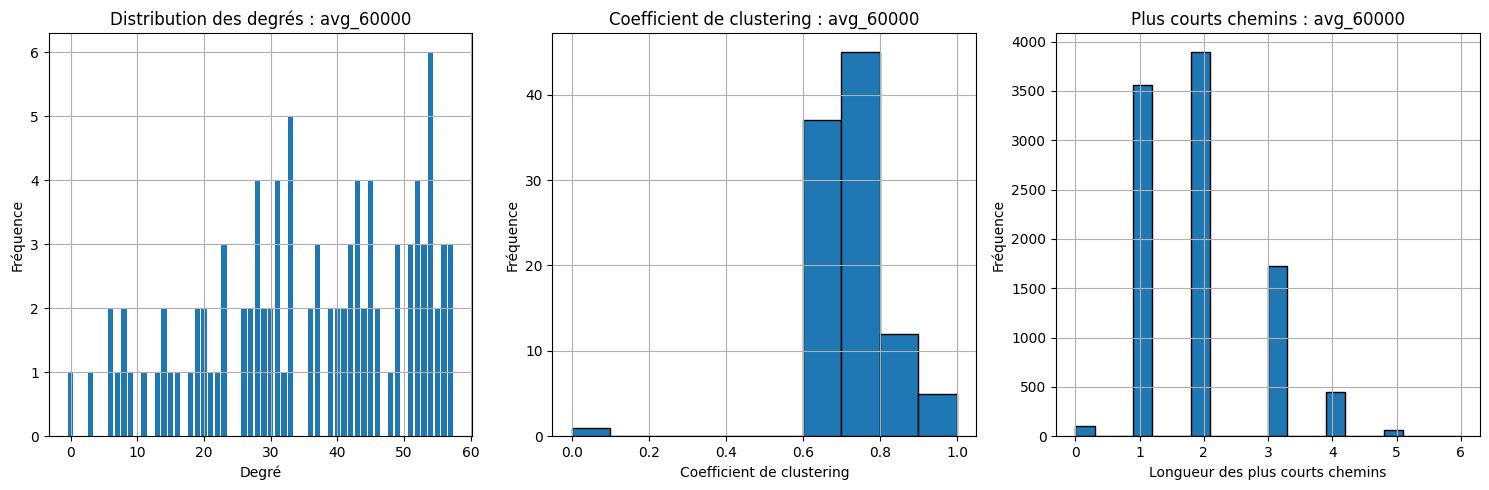


Analyse du graphe : high_20000
   Moyenne des degrés : 3.72
  Moyenne des coefficients de clustering : 0.39812099012099017
  Nombre de cliques : 85
  Nombre de composantes connexes : 23
Résumé des plus courts chemins (high_20000) :
Nombre total de plus courts chemins : 19578.0
Moyenne des plus courts chemins (en excluant les zéros) : 5.09
Nombre maximum de plus courts chemins : 86.0
Nombre minimum de plus courts chemins (en excluant les zéros) : 1.0


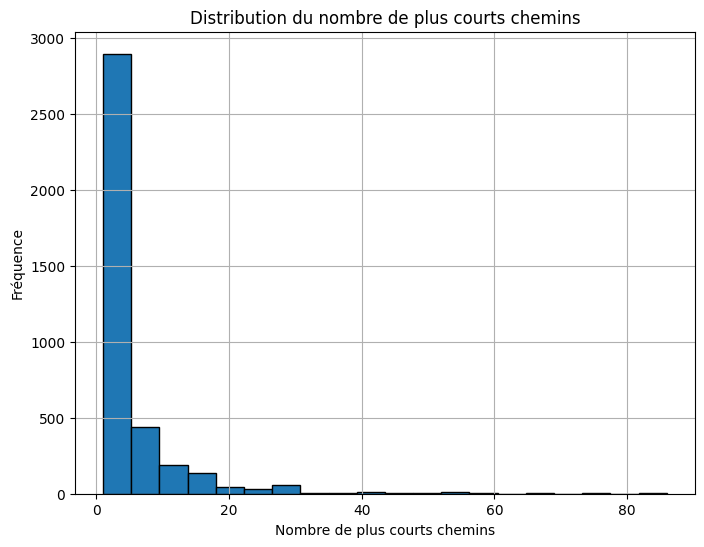

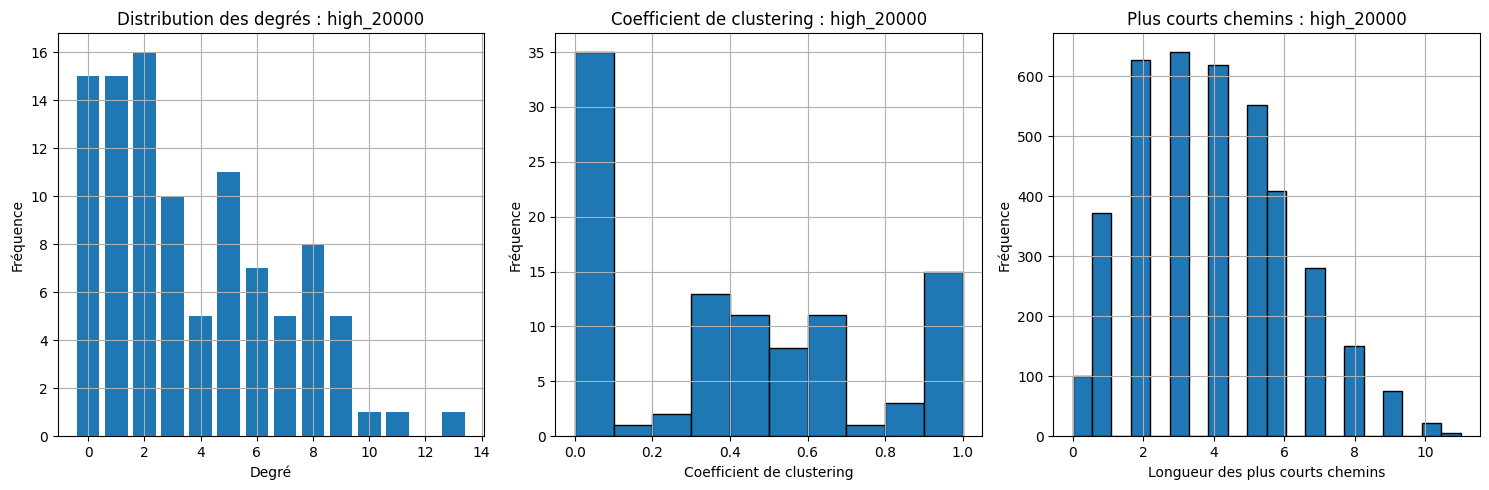


Analyse du graphe : high_40000
   Moyenne des degrés : 18.68
  Moyenne des coefficients de clustering : 0.6650585170179751
  Nombre de cliques : 139
  Nombre de composantes connexes : 4
Résumé des plus courts chemins (high_40000) :
Nombre total de plus courts chemins : 602548.0
Moyenne des plus courts chemins (en excluant les zéros) : 65.34
Nombre maximum de plus courts chemins : 8738.0
Nombre minimum de plus courts chemins (en excluant les zéros) : 1.0


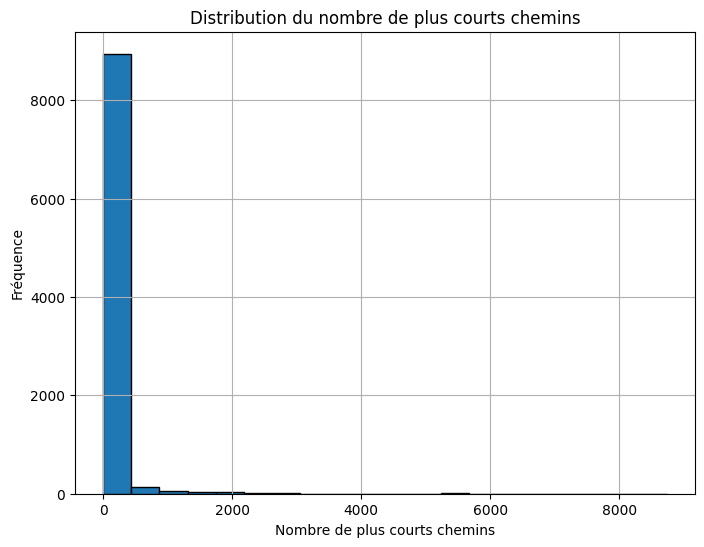

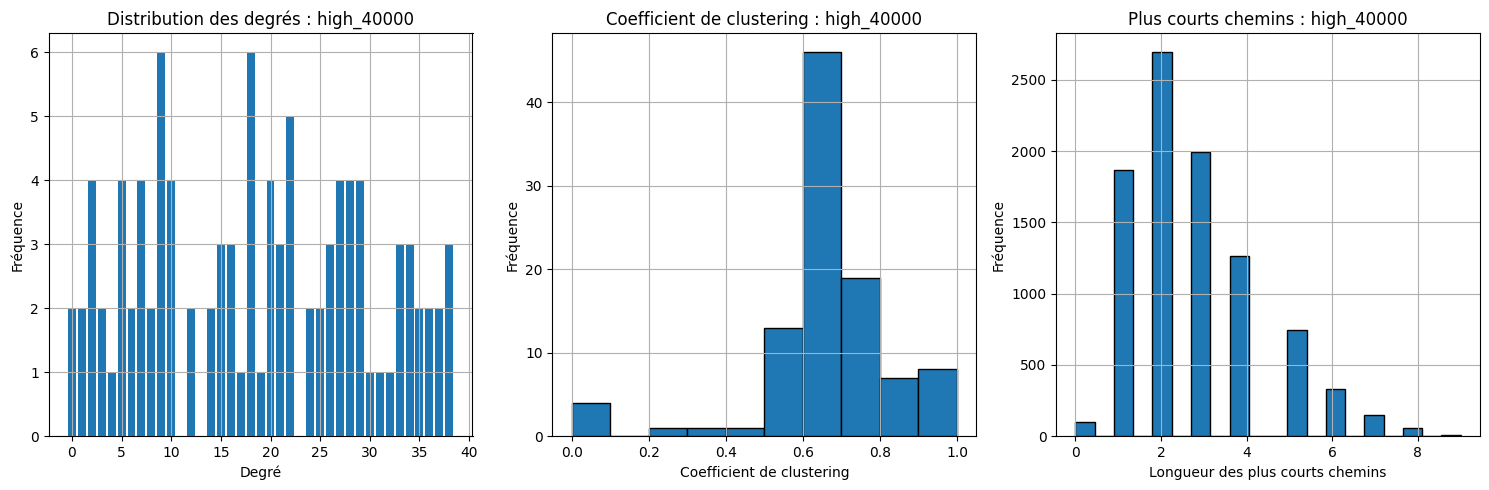


Analyse du graphe : high_60000
   Moyenne des degrés : 37.4
  Moyenne des coefficients de clustering : 0.7280564598604693
  Nombre de cliques : 200
  Nombre de composantes connexes : 2
Résumé des plus courts chemins (high_60000) :
Nombre total de plus courts chemins : 711614.0
Moyenne des plus courts chemins (en excluant les zéros) : 74.06
Nombre maximum de plus courts chemins : 13087.0
Nombre minimum de plus courts chemins (en excluant les zéros) : 1.0


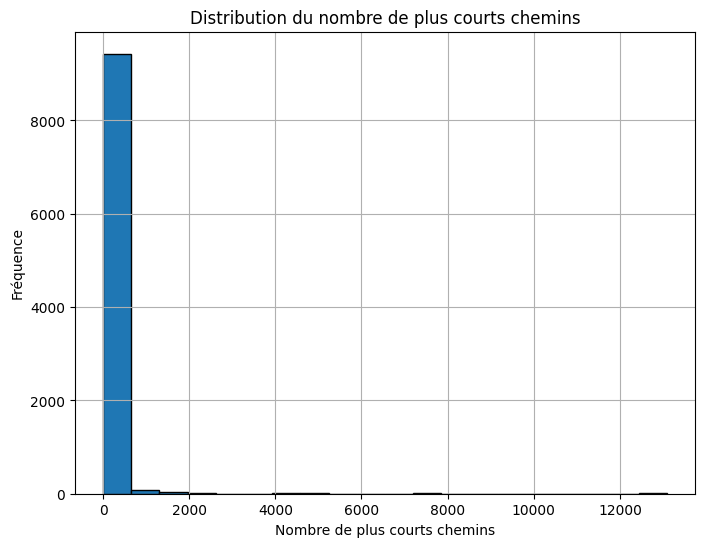

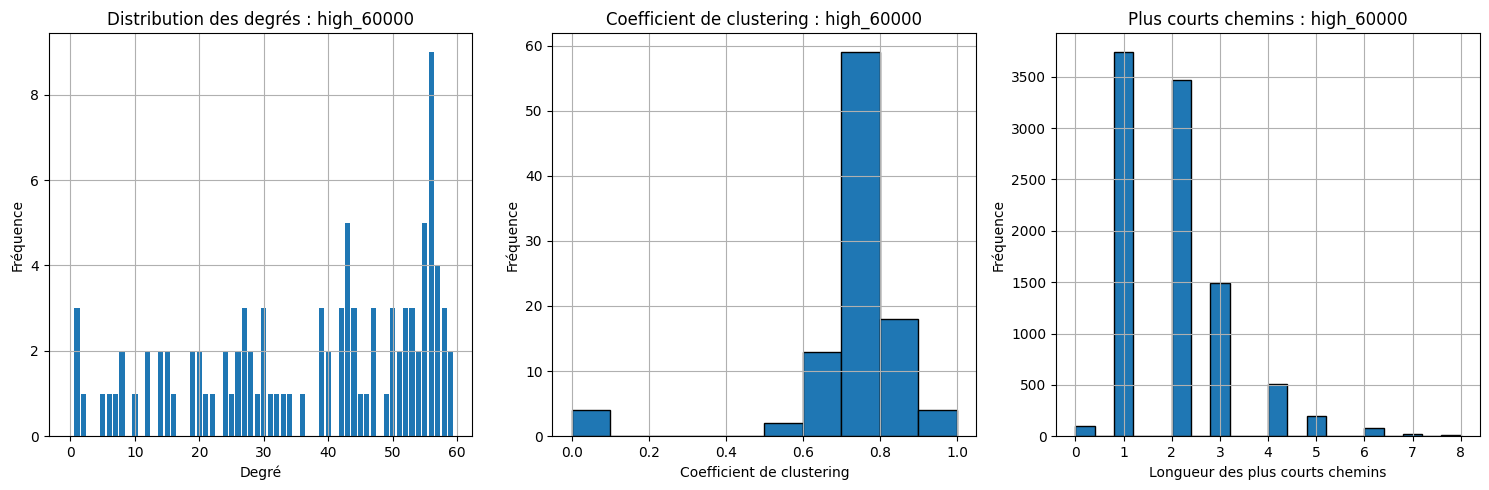

In [3]:
import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Portées à considérer (en mètres)
portees = [20000, 40000, 60000]


# Fonction pour calculer le degré moyen et la distribution du degré
def analyser_degre(A):
    degres = np.sum(A, axis=1)
    moyenne_degre = np.mean(degres)
    distribution_degre = np.bincount(degres.astype(int))
    return moyenne_degre, degres, distribution_degre

# Fonction pour calculer le coefficient de clustering moyen
def analyser_clustering(A):
    G = nx.from_numpy_array(A)
    coeffs_clustering = nx.clustering(G)
    moyenne_clustering = np.mean(list(coeffs_clustering.values()))
    return moyenne_clustering, list(coeffs_clustering.values())

# Fonction pour calculer les cliques et composantes connexes
def analyser_cliques_composantes(A):
    G = nx.from_numpy_array(A)
    cliques = list(nx.find_cliques(G))
    tailles_cliques = [len(clique) for clique in cliques]
    composantes = list(nx.connected_components(G))
    tailles_composantes = [len(comp) for comp in composantes]
    return len(cliques), tailles_cliques, len(composantes), tailles_composantes

# Fonction pour calculer les plus courts chemins et leur nombre
def analyser_plus_courts_chemins(A):
    G = nx.from_numpy_array(A)
    
    # Calcul des longueurs des plus courts chemins
    longueurs = dict(nx.all_pairs_shortest_path_length(G))
    toutes_longueurs = []
    for source, cibles in longueurs.items():
        toutes_longueurs.extend(cibles.values())
    
    # Calcul du nombre de plus courts chemins
    nombre_chemins = np.zeros((len(A), len(A)))  # Initialisation de la matrice
    for source in longueurs:
        for cible in longueurs[source]:
            tous_chemins = list(nx.all_shortest_paths(G, source, cible))
            nombre_chemins[source, cible] = len(tous_chemins)
    
    return toutes_longueurs, nombre_chemins

# Résumer les statistiques pour la matrice des nombres de plus courts chemins
def resumer_matrice_chemins(mat_nombre, cle):
    total_chemins = np.sum(mat_nombre)
    moyenne_chemins = np.mean(mat_nombre[mat_nombre > 0])
    max_chemins = np.max(mat_nombre)
    min_chemins = np.min(mat_nombre[mat_nombre > 0])  

    print(f"Nombre total de plus courts chemins : {total_chemins}")
    print(f"Moyenne des plus courts chemins (en excluant les zéros) : {moyenne_chemins:.2f}")
    print(f"Nombre maximum de plus courts chemins : {max_chemins}")
    print(f"Nombre minimum de plus courts chemins (en excluant les zéros) : {min_chemins}")

    # Distribution des nombres de chemins (Histogramme)
    chemins_non_nuls = mat_nombre[mat_nombre > 0]
    plt.figure(figsize=(8, 6))
    plt.hist(chemins_non_nuls, bins=20, edgecolor="black")
    plt.xlabel("Nombre de plus courts chemins")
    plt.ylabel("Fréquence")
    plt.title("Distribution du nombre de plus courts chemins")
    plt.grid(True)

    # Afficher la figure
    #plt.show()

# Fonction pour afficher et sauvegarder les résultats dans une grille 3x1
def tracer_metriques(cle, degres, distribution_degre, coeffs_clustering, plus_courts_chemins):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Distribution des degrés
    axes[0].bar(range(len(distribution_degre)), distribution_degre)
    axes[0].set_xlabel("Degré")
    axes[0].set_ylabel("Fréquence")
    axes[0].set_title(f"Distribution des degrés : {cle}")
    axes[0].grid(True)

    # Distribution des coefficients de clustering
    axes[1].hist(coeffs_clustering, bins=10, edgecolor="black")
    axes[1].set_xlabel("Coefficient de clustering")
    axes[1].set_ylabel("Fréquence")
    axes[1].set_title(f"Coefficient de clustering : {cle}")
    axes[1].grid(True)

    # Distribution des longueurs des plus courts chemins
    axes[2].hist(plus_courts_chemins, bins=20, edgecolor="black")
    axes[2].set_xlabel("Longueur des plus courts chemins")
    axes[2].set_ylabel("Fréquence")
    axes[2].set_title(f"Plus courts chemins : {cle}")
    axes[2].grid(True)

    # Ajustement des graphiques
    plt.tight_layout()

    # Afficher la figure
    plt.show()

# Intégration complète : Analyser chaque graphe et enregistrer les figures
for cle, A in Adjs.items():
    print(f"\nAnalyse du graphe : {cle}")
    
    # Degré moyen et distribution
    moy_degres, degres, distribution_degres = analyser_degre(A)
    print(f"   Moyenne des degrés : {moy_degres}")
    
    # Coefficient de clustering
    moy_clustering, coeffs_clustering = analyser_clustering(A)
    print(f"  Moyenne des coefficients de clustering : {moy_clustering}")
    
    # Cliques et composantes connexes
    nb_cliques, tailles_cliques, nb_composantes, tailles_composantes = analyser_cliques_composantes(A)
    print(f"  Nombre de cliques : {nb_cliques}")
    print(f"  Nombre de composantes connexes : {nb_composantes}")
    
    # Distribution des plus courts chemins et nombre des chemins
    plus_courts_chemins, matrice_nombre = analyser_plus_courts_chemins(A)
    print(f"Résumé des plus courts chemins ({cle}) :")
    resumer_matrice_chemins(matrice_nombre, cle)
    
    # Afficher et enregistrer les résultats dans une grille
    tracer_metriques(cle, degres, distribution_degres, coeffs_clustering, plus_courts_chemins)


## Partie 3 : 


Analyse du graphe pondéré : low_60000
  Moyenne des degrés pondérés : 56724767563.27
  Moyenne du coefficient de clustering pondéré : 0.30
  Moyenne des plus courts chemins : 2431406622.68


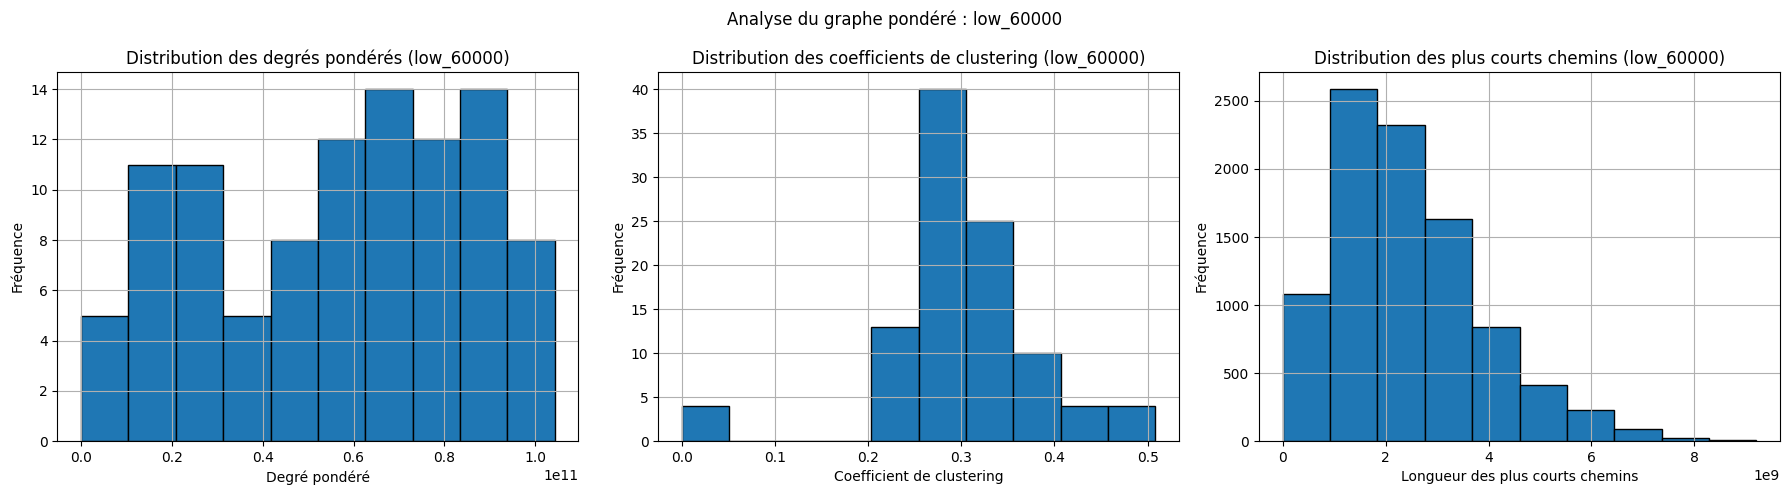


Analyse du graphe pondéré : avg_60000
  Moyenne des degrés pondérés : 62514113022.92
  Moyenne du coefficient de clustering pondéré : 0.28
  Moyenne des plus courts chemins : 1926316046.21


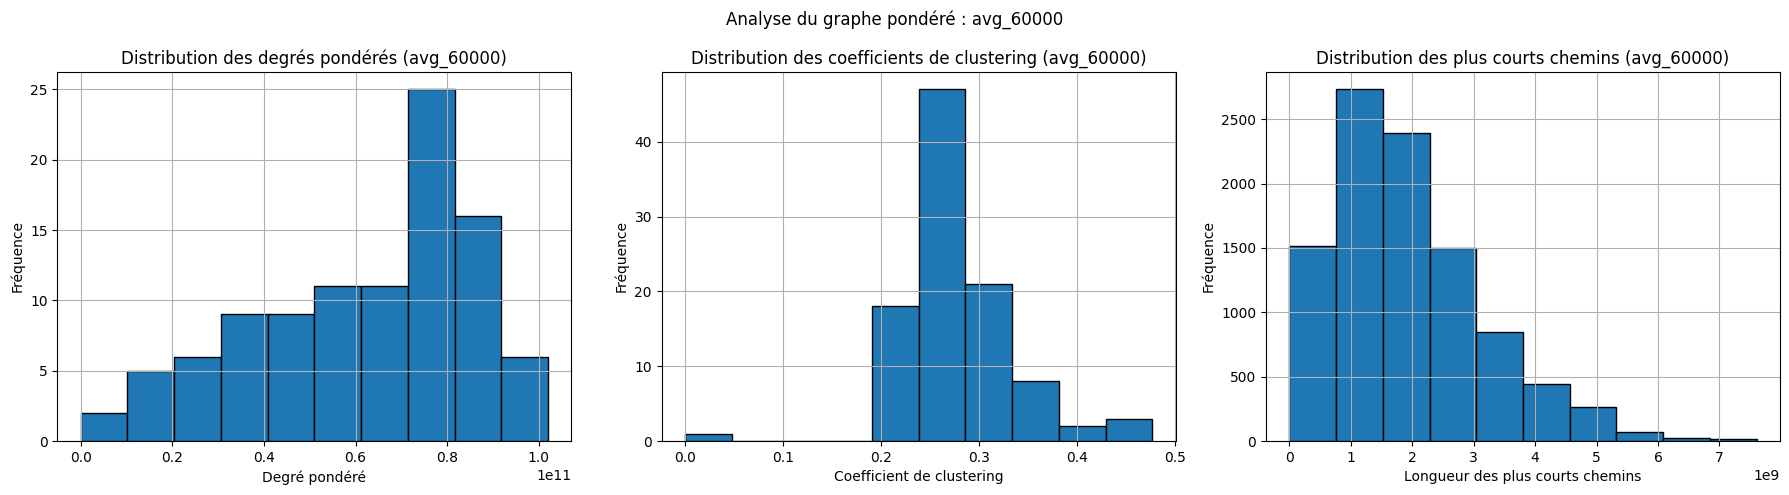


Analyse du graphe pondéré : high_60000
  Moyenne des degrés pondérés : 62621124544.66
  Moyenne du coefficient de clustering pondéré : 0.27
  Moyenne des plus courts chemins : 2158560301.07


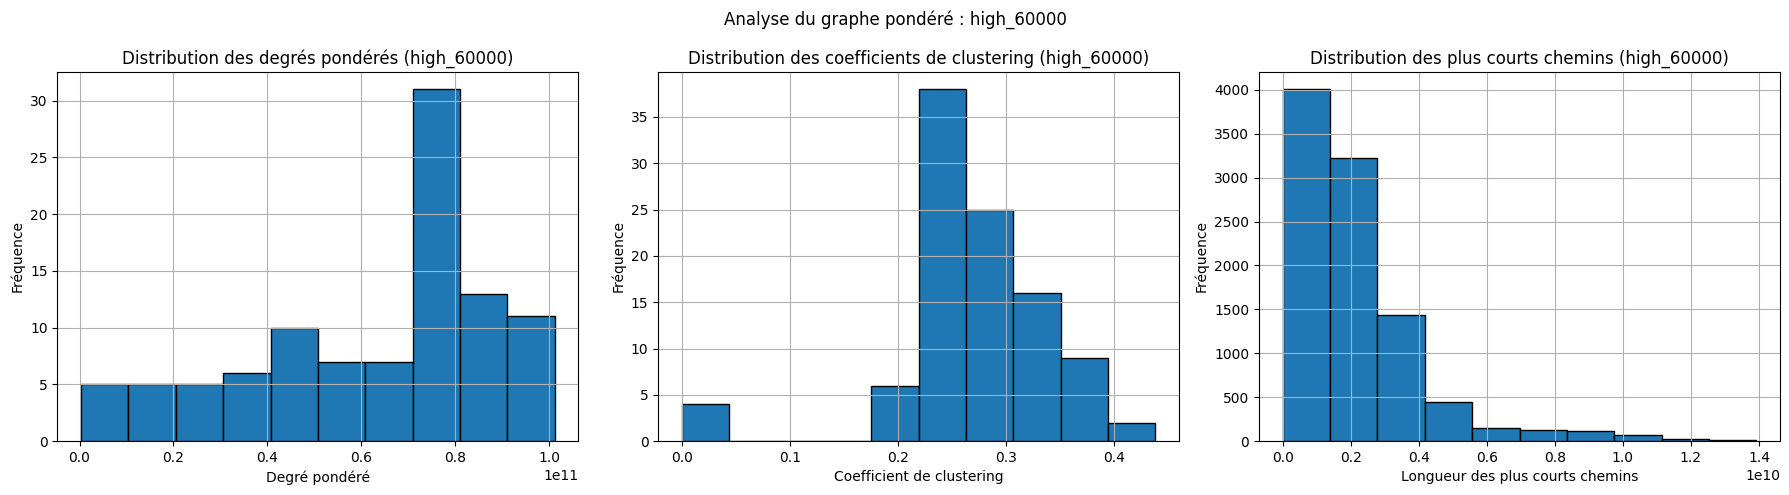

In [4]:
# Fonction pour pondérer la matrice d'adjacence avec les distances
def matrice_ponderee(D, A):
    """
    Applique les poids (carré des distances) aux arêtes de la matrice d'adjacence.
    :param D: Matrice des distances
    :param A: Matrice d'adjacence
    :return: Matrice d'adjacence pondérée
    """
    return (D ** 2) * A

# Fonction pour analyser un graphe pondéré avec visualisation en grille
def analyser_graphe_ponderee(D, A, cle):
    """
    Analyse un graphe pondéré et affiche les résultats dans une grille de 3 graphiques.
    :param D: Matrice des distances
    :param A: Matrice d'adjacence
    :param cle: Nom du graphe (pour les impressions)
    """
    # Création de la matrice d'adjacence pondérée
    A_ponderee = matrice_ponderee(D, A)
    G = nx.from_numpy_array(A_ponderee, parallel_edges=False, create_using=nx.Graph)

    print(f"\nAnalyse du graphe pondéré : {cle}")

    # Initialisation des graphiques en grille
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # 1. Degré moyen pondéré
    degres = [val for (node, val) in G.degree(weight="weight")]
    moy_degre = np.mean(degres)
    print(f"  Moyenne des degrés pondérés : {moy_degre:.2f}")

    # Distribution des degrés pondérés
    axes[0].hist(degres, bins=10, edgecolor="black")
    axes[0].set_xlabel("Degré pondéré")
    axes[0].set_ylabel("Fréquence")
    axes[0].set_title(f"Distribution des degrés pondérés ({cle})")
    axes[0].grid(True)

    # 2. Coefficient de clustering pondéré
    coeffs_clustering = nx.clustering(G, weight="weight")
    moy_clustering = np.mean(list(coeffs_clustering.values()))
    print(f"  Moyenne du coefficient de clustering pondéré : {moy_clustering:.2f}")

    # Distribution des coefficients de clustering pondérés
    axes[1].hist(list(coeffs_clustering.values()), bins=10, edgecolor="black")
    axes[1].set_xlabel("Coefficient de clustering")
    axes[1].set_ylabel("Fréquence")
    axes[1].set_title(f"Distribution des coefficients de clustering ({cle})")
    axes[1].grid(True)

    # 3. Longueurs des plus courts chemins pondérés
    longueurs = dict(nx.all_pairs_dijkstra_path_length(G, weight="weight"))
    toutes_longueurs = [l for longueurs_cible in longueurs.values() for l in longueurs_cible.values()]
    moy_plus_court_chemin = np.mean(toutes_longueurs)
    print(f"  Moyenne des plus courts chemins : {moy_plus_court_chemin:.2f}")

    # Distribution des longueurs des plus courts chemins pondérés
    axes[2].hist(toutes_longueurs, bins=10, edgecolor="black")
    axes[2].set_xlabel("Longueur des plus courts chemins")
    axes[2].set_ylabel("Fréquence")
    axes[2].set_title(f"Distribution des plus courts chemins ({cle})")
    axes[2].grid(True)

    # Ajustement des graphiques
    plt.suptitle(f"Analyse du graphe pondéré : {cle}")
    plt.tight_layout()
    plt.show()

# Analyse des graphes pondérés pour 60 km uniquement
def analyser_graphes_ponderee_60km(Adjs, Distances):
    """
    Analyse tous les graphes pondérés pour une portée fixe de 60 km.
    :param Adjs: Dictionnaire des matrices d'adjacence
    :param Distances: Dictionnaire des matrices de distances
    """
    for cle in Adjs.keys():
        if "60000" in cle:  # Ne traiter que les graphes de portée 60 km
            # Matrice d'adjacence et de distances pour le graphe
            A = Adjs[cle]
            D = Distances[cle]

            # Analyser le graphe pondéré
            analyser_graphe_ponderee(D, A, cle)


# Appel de la fonction pour analyser les graphes pondérés à 60 km
analyser_graphes_ponderee_60km(Adjs, Distances)
